# Preliminary Species Co-occurrance Analysis for Taxon 106656

### Importing modules

In [1]:
try:
    import pyobis
except:
    %pip -q install pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as np
import cartopy
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

In [5]:
from pyobis.occurrences import OccQuery
occ = OccQuery()

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15,10)

## Fetching data
We are fetching data for all *arthropods* to figure out co-occurrence between several zoo-planton species.

In [23]:
data = occ.search(
    geometry = "POLYGON ((152.3438 -66.5591, 54.1406 -66.5591, 54.1406 -42.1362, 152.3438 -42.1362, 152.3438 -66.5591))",
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    taxonid = 1065,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 274053/274053
Fetched 274053 records.


<AxesSubplot:ylabel='scientificName'>

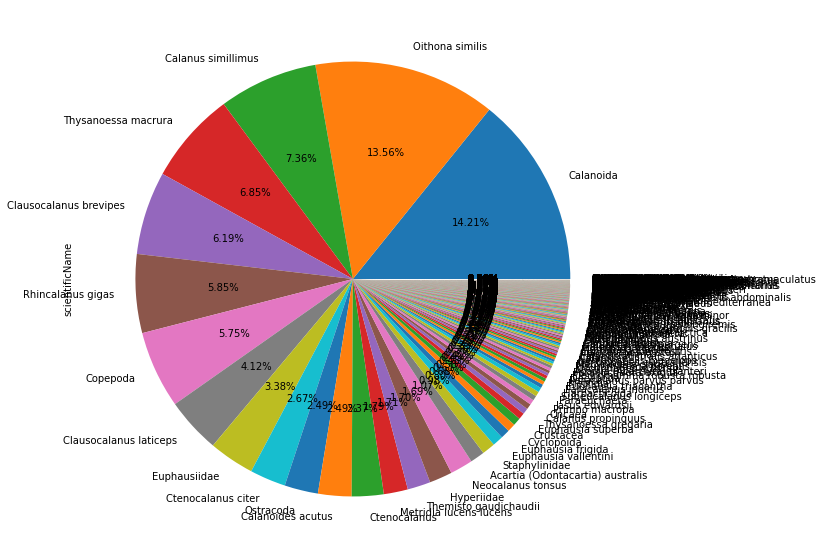

In [32]:
d = data.groupby("scientificName").scientificName.count().sort_values(ascending=False)
d.plot.pie(y="count", autopct="%.2f%%")

For simplicity purpose let us pick up top 20 species.

In [36]:
d = d[:20]

In [38]:
list(data.columns)

['date_year',
 'scientificNameID',
 'year',
 'scientificName',
 'dropped',
 'aphiaID',
 'decimalLatitude',
 'phylumid',
 'familyid',
 'catalogNumber',
 'occurrenceStatus',
 'basisOfRecord',
 'terrestrial',
 'superclass',
 'modified',
 'maximumDepthInMeters',
 'id',
 'day',
 'order',
 'organismQuantity',
 'superclassid',
 'dataset_id',
 'locality',
 'decimalLongitude',
 'collectionCode',
 'date_end',
 'speciesid',
 'occurrenceID',
 'suborderid',
 'date_start',
 'month',
 'genus',
 'organismQuantityType',
 'bibliographicCitation',
 'eventDate',
 'brackish',
 'superorder',
 'scientificNameAuthorship',
 'coordinateUncertaintyInMeters',
 'absence',
 'superorderid',
 'genusid',
 'originalScientificName',
 'marine',
 'minimumDepthInMeters',
 'subphylumid',
 'infraclassid',
 'institutionCode',
 'date_mid',
 'infraclass',
 'class',
 'suborder',
 'orderid',
 'kingdom',
 'waterBody',
 'specificEpithet',
 'classid',
 'phylum',
 'depth',
 'species',
 'subphylum',
 'family',
 'kingdomid',
 'node_id'

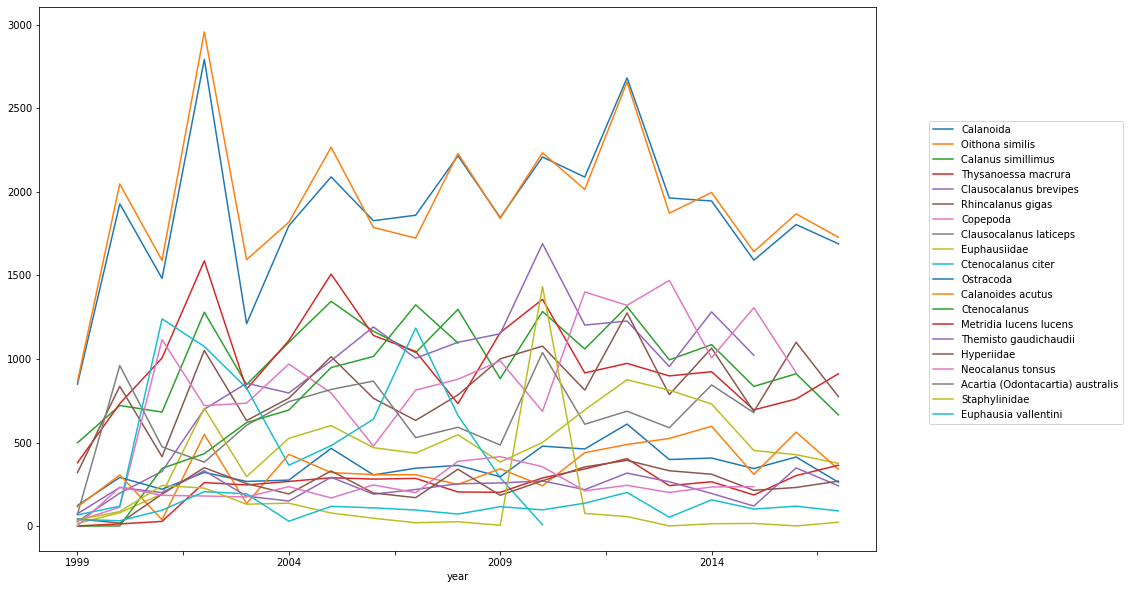

In [72]:
for i in d.index:
    data[data["scientificName"]==i].groupby("year").scientificName.count().plot(label=i)
plt.legend(bbox_to_anchor=[1.3, 0.8])

**Task**: find any two lines that are correlated to orange line -> Oithona similis.

We can see that *Oithona Similis* and *Calanoida* are highly related.

### Shore Distance with time

In [54]:
data = data.sort_values(by="year")

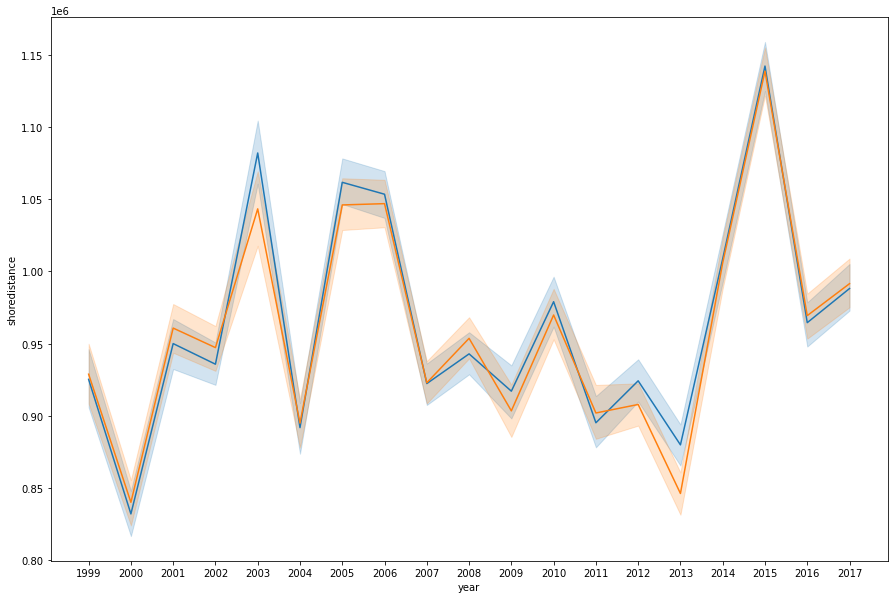

In [59]:
sns.lineplot(x = "year", y = "shoredistance", data = data[data["scientificName"]=="Oithona similis"]);
sns.lineplot(x = "year", y = "shoredistance", data = data[data["scientificName"]=="Calanoida"]);

> ## We can see that Oithona similis and Calanoida are highly correlated.

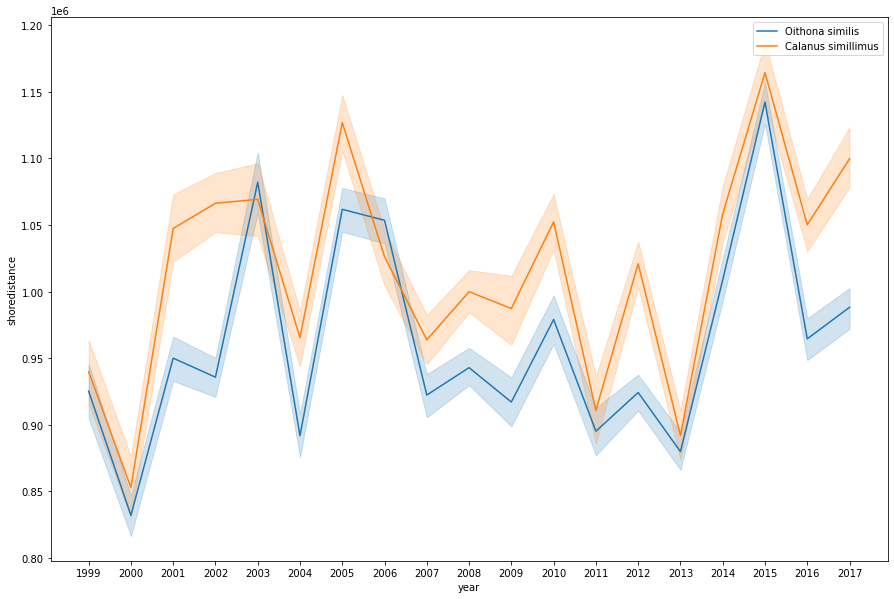

In [64]:
sns.lineplot(x = "year", y = "shoredistance", data = data[data["scientificName"]=="Oithona similis"], label="Oithona similis");
sns.lineplot(x = "year", y = "shoredistance", data = data[data["scientificName"]=="Calanus simillimus"], label="Calanus simillimus");
plt.legend()